# Similarity Graph Visualization

### Multidimensional scaling: 
- MDS is a useful way to visualize high-dimensional distance (or dissimilarity) matrix $D$ in a few - usually two - dimensions.
- MDS is used to measure the dissimilarity between objects - in pairs - and then put the objects in a common space and represent a spatial configuration. In other words, it is a dimension reduction treatment to discover the underlying structure of distance measures between objects.


### Goal of MDS:
- MDS is used to determine whether the distance matrix may be represented by a map or configuration in a small number of dimensions such that distances on the map reproduce, approximately, the original distance matrix.
- Given the number of dimensions, k, the aim of MDS is to find a configuration in k dimensions such that the stress criterion used is minimized.


### Assessment the fit of MDS solution:
- Stress: the measure of Goodness of the fit.
- $stress = \sqrt{\frac{\sum (d_{ij} - \hat{d_{ij}})^2}{\sum d_{ij}^2}}$, where $\hat{d_{ij}}$ is predicted distance based on the MDS model and $d_{ij}$ is the element of distance matrix $D$.
- Scree Plot: the stress against the number of dimensions: as the number of dimensions increases the stress decreases, but there is a tradeoff between improving fit and reducing the interpretability of the solution. ‘Elbow’ point


### Challenges:
- We do not know how many dimensions would be necessary in order to reproduce, even approximately, the given distances between objects.
- One of the prime objects of the analysis will be to discover whether such a representation is possible in a small number of dimensions.
- It is possible that  a local minimum rather than the global minimum will be found when moving the points short distances in such a manner as to reduce the stress slightly on each iteration to improve the configuration.




In [12]:
import numpy as np
import pandas as pd
import re
import os

from collections import Counter
import csv
import time
import json
import glob

import seaborn as sns

from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

from sklearn import manifold  # multidimensional scaling

In [2]:
def return_max_index(corr_mat):
    res_max = {}
    for i, r in enumerate(corr_mat.index):
        tmp = corr_mat[r]
        tmp[r] = 0
        max_index = tmp.idxmax()
        res_max[r] = (max_index, tmp[max_index])
    return res_max

def return_max_column(corr_mat):
    res_max = {}
    for i, r in enumerate(corr_mat.index):
        tmp = corr_mat.loc[r]
        tmp[r] = 0
        max_index = tmp.idxmax()
        res_max[r] = (max_index, tmp[max_index])
    return res_max

def return_largest_n_column(m, n):
    corr_mat = m.copy()
    res_max = {}
    for i, r in enumerate(corr_mat.index):
        tmp = corr_mat.loc[r]
        tmp[r] = 0
        res_max[r] = tmp[sorted(range(len(tmp)), key=lambda k: tmp[k], reverse=True)[:n]].to_dict()
    return res_max

def return_smallest_n_column(m, n):
    corr_mat = m.copy()
    res_max = {}
    for i, r in enumerate(corr_mat.index):
        tmp = corr_mat.loc[r]
        tmp[r] = 0
        res_max[r] = tmp[sorted(range(len(tmp)), key=lambda k: tmp[k], reverse=False)[:n]].to_dict()
    return res_max

### Read matrix data

In [13]:
parent_dir = '.'

filename_list = sorted(glob.glob("{}/Results_week_*".format(parent_dir)))
print(filename_list)

dates_range_list = [f.split('Results_week_')[1].split('_') for f in filename_list]
print(dates_range_list)


#create a dictionary for the months
monthDict = {'01':'Jan', '02':'Feb', '03':'Mar', '04':'Apr', '05':'May', '06':'Jun', 
             '07':'Jul', '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}


sim_mat_restaurant = {}
conf_mat_restaurant = {}

sim_mat_grocery = {}
conf_mat_grocery = {}

for filename in filename_list:
    print(filename)
    
    sim_mat_restaurant[filename] = pd.read_csv('{}/sim_mat_restaurant_all.csv'.format(filename), 
                                 index_col=0)
    conf_mat_restaurant[filename] = pd.read_csv('{}/conf_mat_restaurant_all.csv'.format(filename),
                                  index_col=0)
    print('Restaurant - similarity and confidence matrix:', sim_mat_restaurant[filename].shape,
         conf_mat_restaurant[filename].shape)
    
    sim_mat_grocery[filename] = pd.read_csv('{}/sim_mat_grocery_all.csv'.format(filename), 
                              index_col=0)
    conf_mat_grocery[filename] = pd.read_csv('{}/conf_mat_grocery_all.csv'.format(filename), 
                               index_col=0)
    print('Grocery - similarity and confidence matrix:', sim_mat_grocery[filename].shape,
         conf_mat_grocery[filename].shape, '\n')

['./Results_week_20200713_20200719', './Results_week_20200805_20200811', './Results_week_20201010_20201016']
[['20200713', '20200719'], ['20200805', '20200811'], ['20201010', '20201016']]
./Results_week_20200713_20200719
Restaurant - similarity and confidence matrix: (29, 29) (30, 29)
Grocery - similarity and confidence matrix: (33, 33) (34, 33) 

./Results_week_20200805_20200811
Restaurant - similarity and confidence matrix: (29, 29) (30, 29)
Grocery - similarity and confidence matrix: (33, 33) (34, 33) 

./Results_week_20201010_20201016
Restaurant - similarity and confidence matrix: (32, 32) (33, 32)
Grocery - similarity and confidence matrix: (33, 33) (34, 33) 



In [20]:
print(json.dumps(return_largest_n_column(sim_mat_restaurant['./Results_week_20200713_20200719'], n=6), indent = 4))

# print(json.dumps(return_largest_n_column(conf_mat_restaurant, n=5), indent = 4))

{
    "American Restaurants": {
        "Burgers": 0.057930999999999996,
        "Sandwiches": 0.031942,
        "Mexican Restaurants": 0.029324,
        "Pizza": 0.025729000000000002,
        "Chinese Restaurants": 0.015631,
        "Asian Restaurants": 0.013380000000000001
    },
    "Asian Restaurants": {
        "Chinese Restaurants": 0.031426,
        "Japanese Restaurants": 0.017411000000000003,
        "Latin American Restaurants": 0.016184999999999998,
        "Sushi": 0.014003,
        "American Restaurants": 0.013380000000000001,
        "Mexican Restaurants": 0.012773999999999999
    },
    "BBQ Restaurants": {
        "Chinese Restaurants": 0.005184,
        "Asian Restaurants": 0.005113,
        "Seafood Restaurants": 0.004370000000000001,
        "Japanese Restaurants": 0.003956,
        "Thai Restaurants": 0.003118,
        "Latin American Restaurants": 0.0029649999999999998
    },
    "Bakeries": {
        "American Restaurants": 0.011249,
        "Sandwiches": 0.010748

In [21]:
print(json.dumps(return_largest_n_column(sim_mat_grocery['./Results_week_20200713_20200719'], n=6), indent = 4))


{
    "Bakery": {
        "Fruits & Vegetables": 0.278832,
        "Meat, Seafood & Eggs": 0.255819,
        "Dairy Products": 0.230336,
        "Snack Foods": 0.223221,
        "Prepared Foods": 0.180135,
        "Condiments & Sauces": 0.166752
    },
    "Beer & Liquor": {
        "Tea & Infusions": 1.4999999999999999e-05,
        "Seasonings & Spices": 5e-06,
        "Dairy Products": 1e-06,
        "Fruits & Vegetables": 1e-06,
        "Meat, Seafood & Eggs": 1e-06,
        "Snack Foods": 1e-06
    },
    "Candied & Chocolate Covered Fruit": {
        "Food Gift Baskets": 0.001877,
        "Hot Chocolate": 0.0013189999999999999,
        "Tofu, Soy & Vegetarian Products": 0.0008880000000000001,
        "Candy & Chocolate": 0.000628,
        "Milk": 0.000621,
        "Frozen Desserts & Novelties": 0.000597
    },
    "Candy & Chocolate": {
        "Bakery": 0.1128,
        "Snack Foods": 0.106959,
        "Fruits & Vegetables": 0.10665699999999999,
        "Meat, Seafood & Eggs": 0.1

# Manifold Learning: 
## Multidimensional Scaling

Normalization:
- Global
- Row-based
- others

In [14]:
# ## Global normalization
def get_global_based_norm(df):
    m_norm = df.copy()
    np.fill_diagonal(m_norm.values, 0)
    m_norm = m_norm.applymap(lambda x: (x - m_norm.min().min())/(m_norm.max().max() - m_norm.min().min()))
    return m_norm


# Row-based normalization
def get_row_based_norm(df):
    m_norm = df.copy()

    np.fill_diagonal(m_norm.values, 0)

    for i in range(m_norm.shape[0]):
        m_norm.iloc[i] = ((m_norm.iloc[i] - m_norm.iloc[i].min())/(m_norm.iloc[i].max()-m_norm.iloc[i].min()))

    np.fill_diagonal(m_norm.values, 1)

    m_norm = (m_norm + m_norm.T)/2
   
    return m_norm

def return_dissimilarity(m):
    m_dis = np.zeros((m.shape[0], m.shape[1]))
    for i in range(m.shape[0]):
        for j in range(i+1, m.shape[1]):
            m_dis[i, j] = np.sqrt(2 - 2*m.values[i, j])
    
    m_dis = m_dis + m_dis.T
    m_dis = pd.DataFrame(m_dis, index=m.index, columns=m.columns)
    return m_dis


In [15]:
def get_dfc_norm(category):
    
    dfc = {}

    for filename in filename_list:
        tmp_month = monthDict[filename.split('2020')[1][:2]]
        if category == 'restaurant':
            tmp_df = sim_mat_restaurant[filename]
            dfc[tmp_month] = tmp_df
        if category == 'grocery':
            tmp_df = sim_mat_grocery[filename]
            dfc[tmp_month] = tmp_df
        print(tmp_month, dfc[tmp_month].shape)

    dfc_norm = {}
    for df in dfc:
        dfc_norm[df] = get_row_based_norm(dfc[df])
    
    return dfc, dfc_norm

In [16]:
'''
    Fit the MDS algorithm to the distance matrix and plot the results
'''

def plot_MDS(m_norm, month, category):
      
    m = 1 - m_norm.values

    print(m.shape)
    feature_names = m_norm.index

    mds_model = manifold.MDS(n_components=2, random_state=1, dissimilarity='precomputed') # dissimilarity='precomputed'
    mds_coords = mds_model.fit_transform(m)

    # make directory for pics
    pic_path = os.path.join(parent_dir, 'Pics_MDS')
    if not os.path.exists(pic_path):
        os.mkdir(pic_path)
  
    with PdfPages('{}/MDS_similarity_graph_{}_{}.pdf'.format(pic_path, category, month)) as pdf:

        # plot the figure
        fig = plt.figure(figsize=(15,10))
        plt.scatter(mds_coords[:, 0], mds_coords[:, 1], 
                   facecolors='red', edgecolors='black') # points color
        labels = feature_names
        for label, x, y in zip(labels, mds_coords[:, 0], mds_coords[:, 1]):
            plt.annotate(label, (x, y), xycoords = 'data')
        # plt.xlabel('')
        plt.title('{} - {}: two-dimensional map from MDS algorithm'.format(month.upper(), category.capitalize()))
        pdf.savefig(fig)
        plt.show()
        plt.close()

        # scree plot
        mds_m = {}
        mds_c = {}
        for i in range(1, 16):
            mds_m[i] = manifold.MDS(n_components=i, random_state=1, dissimilarity='precomputed') # dissimilarity='precomputed'
            mds_c[i] = mds_m[i].fit_transform(m)

        mds_stress_list = [model.stress_ for k, model in mds_m.items()]

        fig = plt.figure()
        plt.plot(range(1, 16), mds_stress_list)
        plt.xlabel('Number of dimensions')
        plt.ylabel('Stress')
        plt.title('Scree plot of stress by number of dimensions')

        for i, stress in enumerate(mds_stress_list):
            plt.annotate(round(stress, 1), (i+0.3, stress))
        pdf.savefig(fig)
        plt.show()
        plt.close()

## Restaurant

In [17]:
category = 'restaurant'

dfc_restaurant,\
dfc_norm_restaurant = get_dfc_norm(category)


Jul (29, 29)
Aug (29, 29)
Oct (32, 32)


(29, 29)


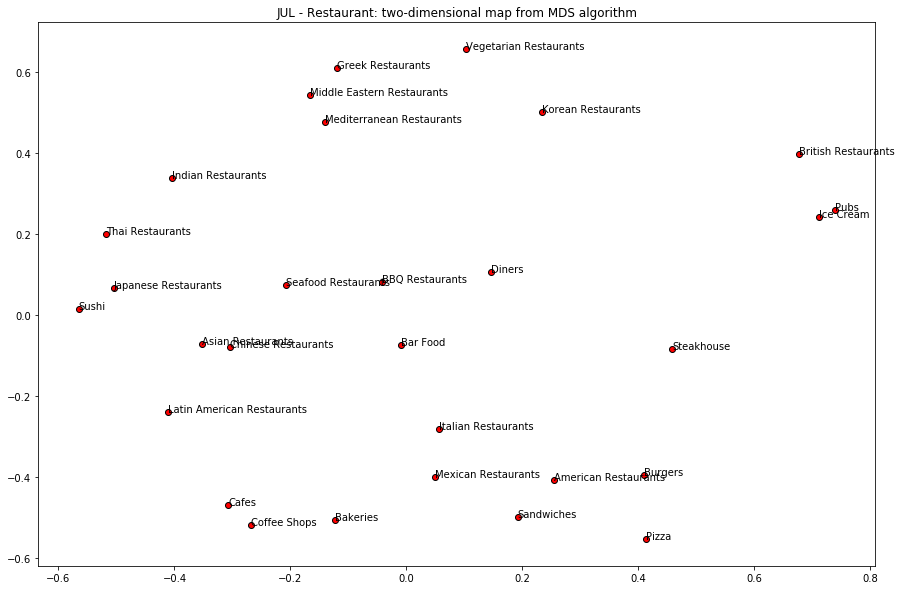

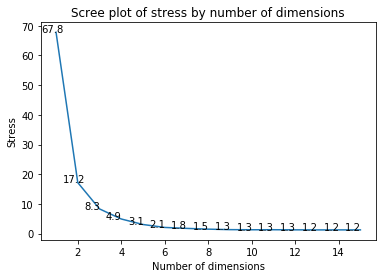

(29, 29)


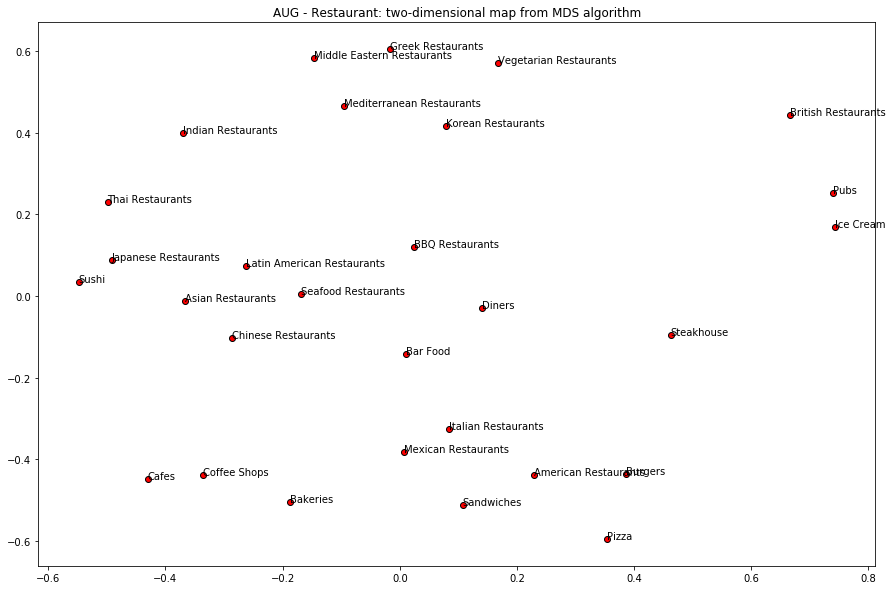

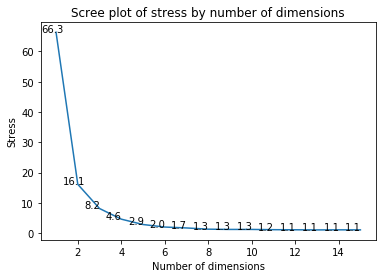

(32, 32)


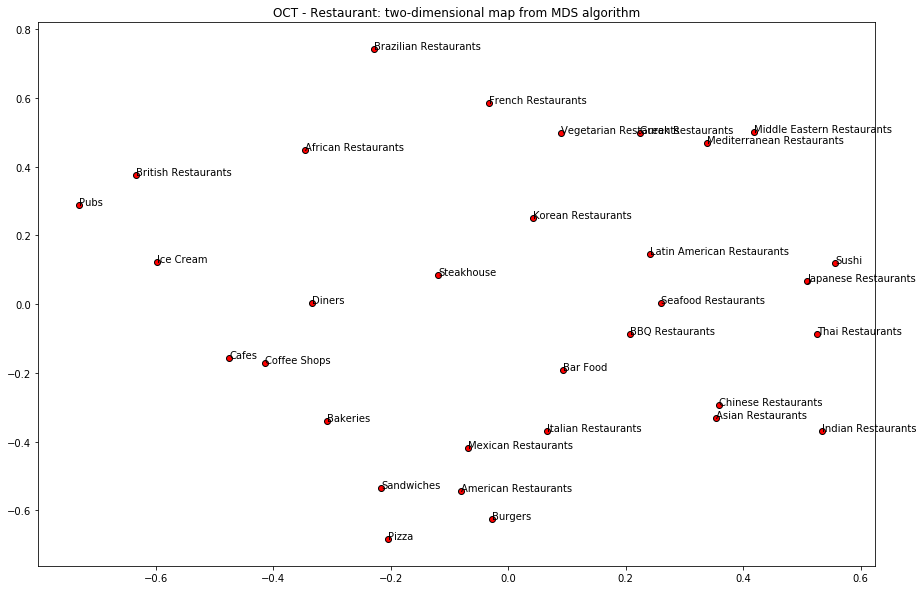

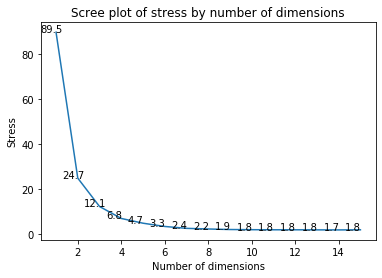

In [18]:
for month, df in dfc_norm_restaurant.items():
    plot_MDS(df, month, category)

## Grocery

In [10]:
category = 'grocery'

dfc_grocery,\
dfc_norm_grocery = get_dfc_norm(category)


Jul (33, 33)
Aug (33, 33)
Oct (33, 33)


(33, 33)


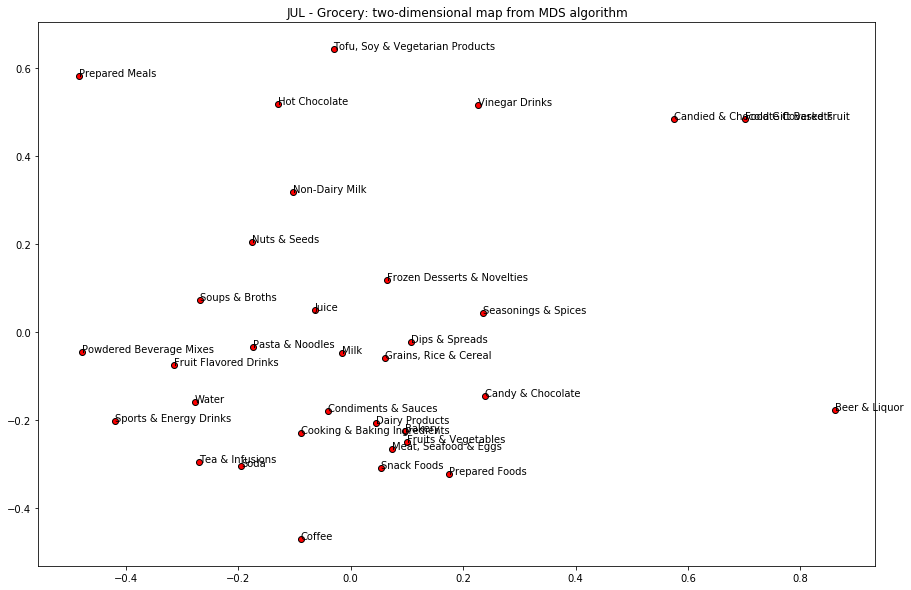

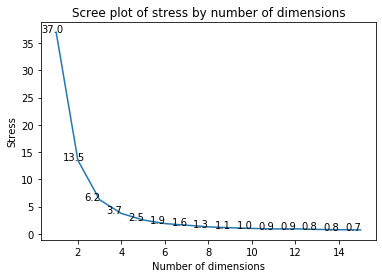

(33, 33)


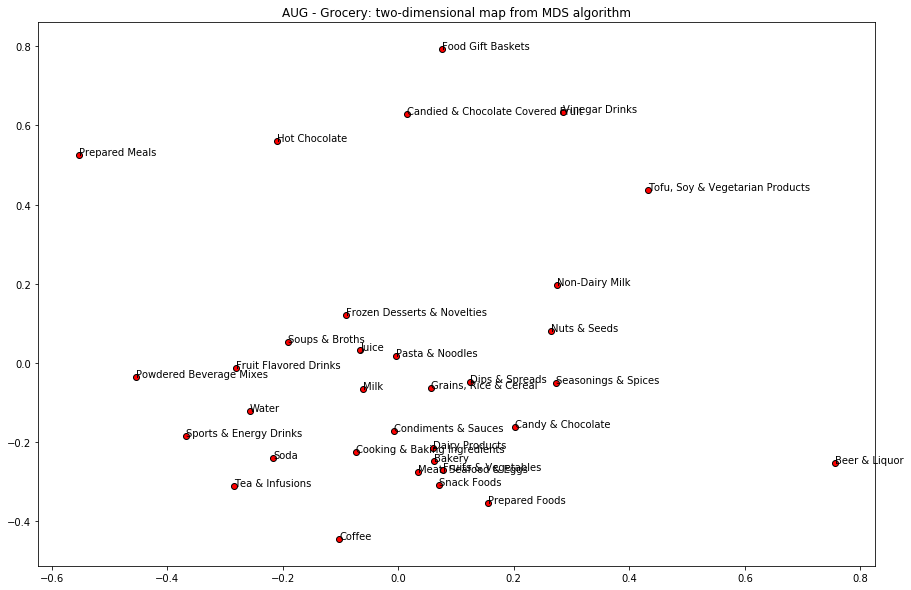

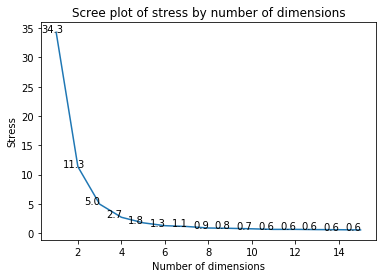

(33, 33)


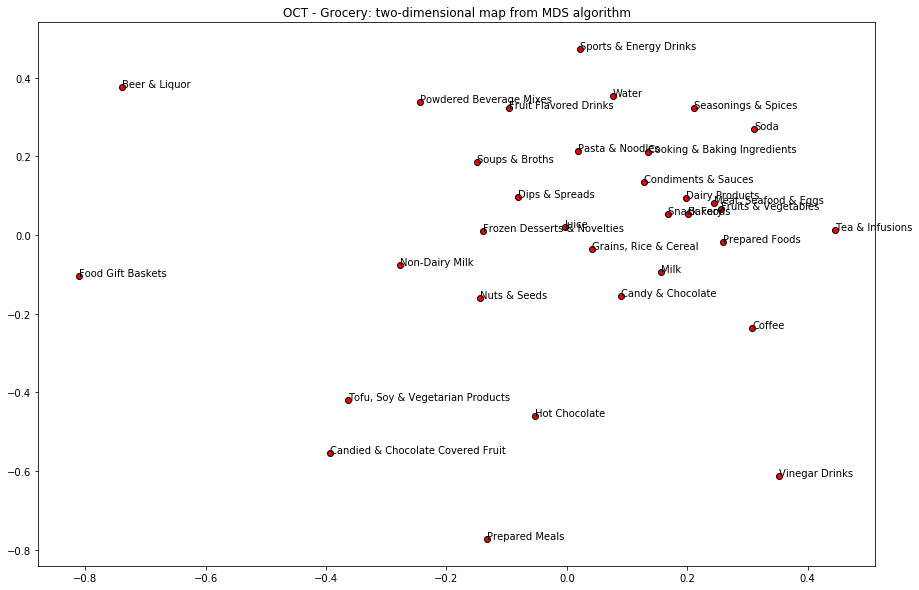

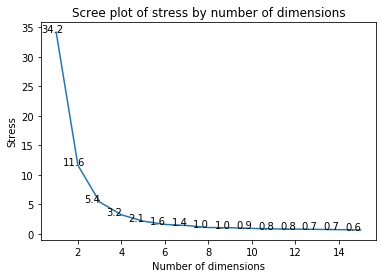

In [11]:
for month, df in dfc_norm_grocery.items():
    plot_MDS(df, month, category)

## Classical MDS algorithm

Suppose a distance matrix $D$ approximates the inter-point distances of a configuration of points $X$ in a space of low dimensionality $p$ (usually $p = 1, 2, 3$). That is, the elements of $D$, denoted $d_{ij}$, may be calculated from $X$ using the following formula:
$$ 
d_{ij} = \sqrt{\sum_{k=1}^p (x_{ik} - x_{jk})^2}
$$

The steps in the classical MDS algorithm are as follows:
1. From $D$ calculate $A = \{ - \frac{1}{2} d_{ij}^2 \}$.
2. From $A$ calculate $B = \{ a_{ij} - a_{i.} - a{.j} + a{..} \}$, where $a_{i.}$ is the average of all $a_{ij}$ across $j$.
3. Find the $p$ largest eigenvalues $\lambda_1 > \lambda_2 > \dots > \lambda_p$ of $B$ and corresponding eigenvectors $L = ( L_{(1)}, L_{(2)}, \dots, L_{(p)} )$ which are normalized so that $L^T_{(i)} L_{(i)} = \lambda_i$. (We are assuming that $p$ is selected so that the eigenvalues are all relatively large and positive.)
4. The coordinates of the objects are the rows of $L$.

The classical solution is optimal in the least-square sense.
That is, when a direct solution is possible (when D is truly a Euclidean distance matrix rather than the dissimilarity matrix), the solution $L$, minimizes the sum of squared difference between the actual $d_{ij}$'s (elements of $D$) and the $\hat{d_{ij}}$'s based on $L$.
Another way of saying this is that it minimizes the value of $stress$.


In [ ]:

def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals


## Graph Visualization: similarity matrix

In [9]:
import networkx as nx

In [14]:
'''
    category: [restaurant, grocery]
    m: similarity matrix
        - sim_mat_restaurant
        - sim_mat_grocery
    
'''

def plot_similarity_graph(m, filename, category, day):
    
    edgeList = {}
    edgeList['node1'] = []
    edgeList['node2'] = []
    edgeList['distance'] = []

    for i in range(m.shape[0]):
        for j in range(i+1, m.shape[0]):
            edgeList['node1'].append(m.index[i])
            edgeList['node2'].append(m.columns[j])
            edgeList['distance'].append(m.iloc[i, j])
    edgeList = pd.DataFrame(edgeList)

    # Create empty graph
    G = nx.Graph()

    # Add nodes
    for f in m.index:
        G.add_node(str(f))

    # Add edges and edge attributes
    for i, elrow in edgeList.iterrows():
        G.add_weighted_edges_from([[str(elrow[0]), str(elrow[1]),elrow[2]]])

    pos = nx.spring_layout(G, weight='weight')

    # G.edges(data=True)
    
    '''
        Network graph: WITH edges
    '''

    pic_path = os.path.join(parent_dir, 'Pic_{}'.format(filename))
    if not os.path.exists(pic_path):
        os.mkdir(pic_path)

    plt.figure(figsize=(80, 80))
    nx.draw(G, pos=pos, with_labels=True, node_color = 'yellowgreen', 
           edge_color = 'lightgray', font_size = 50, node_size = 2500) # width=5, 
    plt.savefig('{}/{}_similarity_graph_{}.png'.format(pic_path, category, day))
#     plt.show()
    plt.close()


In [15]:
'''
    category: [restaurant, grocery]
    m: similarity matrix
        - sim_mat_restaurant
        - sim_mat_grocery
    
'''

'''
    category: [restaurant, grocery]
    m: similarity matrix
        - sim_mat_restaurant
        - sim_mat_grocery
    
'''

def plot_similarity_graph_pdf(tmp_path, category, dates):


    with PdfPages('{}/all_similarity_graph_{}.pdf'.format(tmp_path, category)) as pdf:
    
        m = pd.read_csv('{}/sim_mat_{}_all.csv'.format(tmp_path, category), index_col=0)

        edgeList = {}
        edgeList['node1'] = []
        edgeList['node2'] = []
        edgeList['distance'] = []

        for i in range(m.shape[0]):
            for j in range(i+1, m.shape[0]):
                edgeList['node1'].append(m.index[i])
                edgeList['node2'].append(m.columns[j])
                edgeList['distance'].append(m.iloc[i, j])
        edgeList = pd.DataFrame(edgeList)

        # Create empty graph
        G = nx.Graph()

        # Add nodes
        for f in m.index:
            G.add_node(str(f))

        # Add edges and edge attributes
        for i, elrow in edgeList.iterrows():
            G.add_weighted_edges_from([[str(elrow[0]), str(elrow[1]),elrow[2]]])

        pos = nx.spring_layout(G, weight='weight')

        # G.edges(data=True)

        '''
            Network graph: WITH edges
        '''
        fig = plt.figure(figsize = (80, 80))
        nx.draw(G, pos=pos, with_labels=True, node_color = 'yellowgreen', 
               edge_color = 'lightgray', font_size = 50, node_size = 2500) # width=5, 
#         txt = '{}-{}: Similarity graph of {}'.format(dates[0], dates[-1], category)
#         plt.text(0.05, 0.95, txt, transform=fig.transFigure, size = 60)
        pdf.savefig(fig)
        plt.close()
